# Group 3
1. Karma Tenzin (12190057)
2. Kinley Gyeltshen (12190060)
3. Rashmi Gurung (12190072)
4. Samten Wangmo (12190073)

## 1. Import libraries

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

## 2. Loading datasets

In [116]:
# Load data into dataframe
df = pd.read_csv("/content/adult.data", sep=',',names=["age","workclass", "fnlwgt", "education",
                        "education-num", "marital-status", 
                        "occupation", "relationship", "race", 
                        "sex", "capital-gain", "capital-loss", 
                        "hours-per-week", "ZipConative-countryde","y"])
df

age          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital-gain  capital-loss  hours-per-week  \
0         Male          2174             0              40   
1         Male             0             0              13   
2         Male             0             0              40   
3         Male             0             0              40   
4       Female             0             0              40   
...        ...           ...           ...             ...   
32556   Female             0             0              38   
32557     Male             0             0              40   
32558   Female             0             0              40   
32559     Male             0             0              20   
32560   Female         15024             0              40   

      ZipConative-countryde       y  
0             United-States   <=50K  
1             United-States   <=50K  
2             United-States   <=50K  
3             United-States   <=50K  
4                      Cuba   <=50K  
...                     ...     ...  
32556         United-States   <=50K  
32557         United-States    >50K  
32558         United-States   <=50K  
32559         United-States   <=50K  
32560         United-States    >50K  

[32561 rows x 15 columns]

In [117]:
# check the summary info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age                    32561 non-null  int64 
 1   workclass              32561 non-null  object
 2   fnlwgt                 32561 non-null  int64 
 3   education              32561 non-null  object
 4   education-num          32561 non-null  int64 
 5   marital-status         32561 non-null  object
 6   occupation             32561 non-null  object
 7   relationship           32561 non-null  object
 8   race                   32561 non-null  object
 9   sex                    32561 non-null  object
 10  capital-gain           32561 non-null  int64 
 11  capital-loss           32561 non-null  int64 
 12  hours-per-week         32561 non-null  int64 
 13  ZipConative-countryde  32561 non-null  object
 14  y                      32561 non-null  object
dtypes: int64(6), object

In [118]:
df.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [119]:
df.shape

(32561, 15)

## 3. Cleaning Datasets

In [120]:
# check for missing values
df.isnull().sum()

age                      0
workclass                0
fnlwgt                   0
education                0
education-num            0
marital-status           0
occupation               0
relationship             0
race                     0
sex                      0
capital-gain             0
capital-loss             0
hours-per-week           0
ZipConative-countryde    0
y                        0
dtype: int64

There are no missing values in the datasets.

In [121]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [122]:
df.replace(" ?", np.nan, inplace = True)
df["workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [123]:
# check the datatypes
df.dtypes

age                       int64
workclass                object
fnlwgt                    int64
education                object
education-num             int64
marital-status           object
occupation               object
relationship             object
race                     object
sex                      object
capital-gain              int64
capital-loss              int64
hours-per-week            int64
ZipConative-countryde    object
y                        object
dtype: object

#4. Dropping the duplicates 

In [124]:
df.duplicated().sum()

24

In [125]:
df = df.drop_duplicates(keep='first')

In [126]:
df.duplicated().sum()

0

#5. Data Preprocessing [ Encoding and scaling]

In [127]:
# Categorical Features 

categorical_features= df.select_dtypes(include = ['object'])
categorical_features


workclass    education       marital-status  \
0              State-gov    Bachelors        Never-married   
1       Self-emp-not-inc    Bachelors   Married-civ-spouse   
2                Private      HS-grad             Divorced   
3                Private         11th   Married-civ-spouse   
4                Private    Bachelors   Married-civ-spouse   
...                  ...          ...                  ...   
32556            Private   Assoc-acdm   Married-civ-spouse   
32557            Private      HS-grad   Married-civ-spouse   
32558            Private      HS-grad              Widowed   
32559            Private      HS-grad        Never-married   
32560       Self-emp-inc      HS-grad   Married-civ-spouse   

               occupation    relationship    race      sex  \
0            Adm-clerical   Not-in-family   White     Male   
1         Exec-managerial         Husband   White     Male   
2       Handlers-cleaners   Not-in-family   White     Male   
3       Handlers-cleaners         Husband   Black     Male   
4          Prof-specialty            Wife   Black   Female   
...                   ...             ...     ...      ...   
32556        Tech-support            Wife   White   Female   
32557   Machine-op-inspct         Husband   White     Male   
32558        Adm-clerical       Unmarried   White   Female   
32559        Adm-clerical       Own-child   White     Male   
32560     Exec-managerial            Wife   White   Female   

      ZipConative-countryde       y  
0             United-States   <=50K  
1             United-States   <=50K  
2             United-States   <=50K  
3             United-States   <=50K  
4                      Cuba   <=50K  
...                     ...     ...  
32556         United-States   <=50K  
32557         United-States    >50K  
32558         United-States   <=50K  
32559         United-States   <=50K  
32560         United-States    >50K  

[32537 rows x 9 columns]

In [128]:
# Numerical Features

numerical_features = df.select_dtypes(include = ['int64','float64'])
numerical_features

age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week
0       39   77516             13          2174             0              40
1       50   83311             13             0             0              13
2       38  215646              9             0             0              40
3       53  234721              7             0             0              40
4       28  338409             13             0             0              40
...    ...     ...            ...           ...           ...             ...
32556   27  257302             12             0             0              38
32557   40  154374              9             0             0              40
32558   58  151910              9             0             0              40
32559   22  201490              9             0             0              20
32560   52  287927              9         15024             0              40

[32537 rows x 6 columns]

In [129]:
categorical_features.isna().sum()

workclass                1836
education                   0
marital-status              0
occupation               1843
relationship                0
race                        0
sex                         0
ZipConative-countryde     582
y                           0
dtype: int64

In [130]:
from sklearn.impute import SimpleImputer

imputeN = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
categorical_data = imputeN.fit_transform(categorical_features)
categorical_data = pd.DataFrame(data = categorical_data, columns = categorical_features.columns)
categorical_data.head()

workclass   education       marital-status          occupation  \
0          State-gov   Bachelors        Never-married        Adm-clerical   
1   Self-emp-not-inc   Bachelors   Married-civ-spouse     Exec-managerial   
2            Private     HS-grad             Divorced   Handlers-cleaners   
3            Private        11th   Married-civ-spouse   Handlers-cleaners   
4            Private   Bachelors   Married-civ-spouse      Prof-specialty   

     relationship    race      sex ZipConative-countryde       y  
0   Not-in-family   White     Male         United-States   <=50K  
1         Husband   White     Male         United-States   <=50K  
2   Not-in-family   White     Male         United-States   <=50K  
3         Husband   Black     Male         United-States   <=50K  
4            Wife   Black   Female                  Cuba   <=50K

In [131]:
categorical_data.isna().sum()

workclass                0
education                0
marital-status           0
occupation               0
relationship             0
race                     0
sex                      0
ZipConative-countryde    0
y                        0
dtype: int64

In [132]:
numerical_features.isna().sum()

age               0
fnlwgt            0
education-num     0
capital-gain      0
capital-loss      0
hours-per-week    0
dtype: int64

In [133]:
# Scaling the numerical features

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
numerical_scaled = sc.fit_transform(numerical_features)
numerical_features = pd.DataFrame(data = numerical_scaled, columns = numerical_features.columns)
numerical_features.head()

age    fnlwgt  education-num  capital-gain  capital-loss  \
0  0.030390 -1.063569       1.134777      0.148292     -0.216743   
1  0.836973 -1.008668       1.134777     -0.145975     -0.216743   
2 -0.042936  0.245040      -0.420679     -0.145975     -0.216743   
3  1.056950  0.425752      -1.198407     -0.145975     -0.216743   
4 -0.776193  1.408066       1.134777     -0.145975     -0.216743   

   hours-per-week  
0       -0.035664  
1       -2.222483  
2       -0.035664  
3       -0.035664  
4       -0.035664

In [134]:
# y as the target value

y = categorical_data.y

In [135]:
categorical_data = categorical_data.drop(["y"], axis = 1)

In [136]:
# Encoding the categorical features

from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
encoded_data = oe.fit_transform(categorical_data)
categorical_data = pd.DataFrame(data = encoded_data,columns=categorical_data.columns)

In [137]:
# Concating the numerical features and categorical features 

X = pd.concat([categorical_data, numerical_features],axis=1)
X.head()

workclass  education  marital-status  occupation  relationship  race  sex  \
0        6.0        9.0             4.0         0.0           1.0   4.0  1.0   
1        5.0        9.0             2.0         3.0           0.0   4.0  1.0   
2        3.0       11.0             0.0         5.0           1.0   4.0  1.0   
3        3.0        1.0             2.0         5.0           0.0   2.0  1.0   
4        3.0        9.0             2.0         9.0           5.0   2.0  0.0   

   ZipConative-countryde       age    fnlwgt  education-num  capital-gain  \
0                   38.0  0.030390 -1.063569       1.134777      0.148292   
1                   38.0  0.836973 -1.008668       1.134777     -0.145975   
2                   38.0 -0.042936  0.245040      -0.420679     -0.145975   
3                   38.0  1.056950  0.425752      -1.198407     -0.145975   
4                    4.0 -0.776193  1.408066       1.134777     -0.145975   

   capital-loss  hours-per-week  
0     -0.216743       -0.035664  
1     -0.216743       -2.222483  
2     -0.216743       -0.035664  
3     -0.216743       -0.035664  
4     -0.216743       -0.035664

In [138]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, ..., 0, 0, 1])

#6. Train and Test

In [139]:
#Spliting

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5, shuffle=True, stratify= y)


In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

###6.1: Logistic Regression

In [141]:
LR_model = LogisticRegression()
LR_model = LR_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [142]:
 y_pred_LR = LR_model.predict(X_test)

In [143]:
from sklearn import metrics
LR_cm = metrics.confusion_matrix(y_test, y_pred_LR)
LR_cm

array([[4644,  296],
       [ 860,  708]])

In [144]:
acc_lr = metrics.accuracy_score(y_test, y_pred_LR)
acc_lr

0.8223724646588814

In [145]:
print(metrics.classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4940
           1       0.71      0.45      0.55      1568

    accuracy                           0.82      6508
   macro avg       0.77      0.70      0.72      6508
weighted avg       0.81      0.82      0.81      6508



### 6.2: KNN 

In [146]:
KNN_model = KNeighborsClassifier(n_neighbors=5)  
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [147]:
y_pred_knn = KNN_model.predict(X_test)  

In [148]:
KNN_cm = metrics.confusion_matrix(y_test, y_pred_knn) 
KNN_cm

array([[4452,  488],
       [ 666,  902]])

In [149]:
print(metrics.accuracy_score(y_test, y_pred_knn)) 

0.822679778733866


In [150]:
print(metrics.classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      4940
           1       0.65      0.58      0.61      1568

    accuracy                           0.82      6508
   macro avg       0.76      0.74      0.75      6508
weighted avg       0.82      0.82      0.82      6508



###6.3: Decision Tree

In [151]:
DT_model = DecisionTreeClassifier(random_state=1)
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [152]:
y_pred_dt = DT_model.predict(X_test)

In [153]:
DT_cm = metrics.confusion_matrix(y_test, y_pred_dt)
DT_cm

array([[4310,  630],
       [ 600,  968]])

In [154]:
print(metrics.accuracy_score(y_test, y_pred_dt)) 

0.81100184388445


In [155]:
print(metrics.classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      4940
           1       0.61      0.62      0.61      1568

    accuracy                           0.81      6508
   macro avg       0.74      0.74      0.74      6508
weighted avg       0.81      0.81      0.81      6508



### 6.4: Random Forest

In [156]:
from sklearn.ensemble import RandomForestClassifier

In [157]:
RF_model = RandomForestClassifier(n_estimators= 50,min_samples_leaf=2)
RF_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=2, n_estimators=50)

In [158]:
RF_model.score(X_train, y_train)

0.9389142879096393

In [159]:
#RF.score(xtest, ytest)
acc2 = RF_model.score(X_test,y_test)
print(acc2)

0.8601720958819914


In [160]:
ypred = RF_model.predict(X_test)

In [161]:
rf_cm = metrics.confusion_matrix(y_test, ypred)
rf_cm

array([[4614,  326],
       [ 584,  984]])

Text(39.5, 0.5, 'Truth')

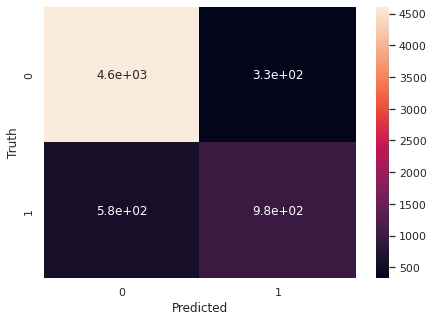

In [162]:
sns.heatmap(data=rf_cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [163]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4940
           1       0.75      0.63      0.68      1568

    accuracy                           0.86      6508
   macro avg       0.82      0.78      0.80      6508
weighted avg       0.85      0.86      0.86      6508



In [164]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_test,ypred,average = 'micro'))

0.8601720958819914


In [165]:
print(recall_score(y_test,ypred,average = 'micro'))

0.8601720958819914


In [166]:
from sklearn.metrics import f1_score
print(f1_score(y_test,ypred,average = 'micro'))

0.8601720958819914
